<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Building a Reflection Agent with LangGraph**


Estimated time needed: **45** minutes


In this guided project, you'll learn to build Reflection agents using LangGraph, a powerful tool for creating self-improving AI systems. Reflection agents represent a significant advancement in AI capabilities - they can evaluate their own outputs, identify weaknesses, and iteratively improve through feedback loops. You'll start by understanding the concept of reflection in AI, then build a complete reflection agent that can generate content, evaluate its quality, and refine outputs through multiple iterations. Working with a LinkedIn post generator as your example, you'll implement a graph-based workflow that mimics human-like reflective thinking, enabling the agent to transform basic content into polished, engaging outputs. By the end of this project, you'll have hands-on experience creating AI systems that can think critically about their own work and continuously improve their performance.


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#What-is-Reflection?">What is Reflection?</a>
    </li>
    <li>
        <a href="#Workflow-of-Reflection-Agent-in-LangGraph:">Workflow of Reflection Agent in LangGraph</a>
    </li>
    <li>
        <a href="#Building-an-Optimized-LinkedIn-Post-Generator-with-a-Reflection-Agent">Building an Optimized LinkedIn Post Generator with a Reflection Agent</a>
        <ol>
            <li><a href="#Instantiating-the-Language-Model">Instantiating the Language Model</a></li>
            <li><a href="#Generation-Prompt-for-Posts">Generation Prompt for Posts</a></li>
            <li><a href="#Creating-the-Chain-for-LinkedIn-Post-Generation">Creating the Chain for LinkedIn Post Generation</a></li>
            <li><a href="#Reflection-Prompt-for-LinkedIn-Post-Critique">Reflection Prompt for LinkedIn Post Critique</a></li>
            <li><a href="#Creating-the-Reflect-Chain">Creating the Reflect Chain</a></li>
            <li><a href="#Defining-the-Agent-State-for-Reflection-Agent">Defining the Agent State for Reflection Agent</a></li>
            <li><a href="#Defining-the-Generation-and-Reflection--Node">Defining the Generation and Reflection Node</a></li>
            <li><a href="#Why-HumanMessage?">Why HumanMessage?</a></li>
            <li><a href="#Adding-the-Generate-Node-to-the-Graph">Adding the Generate Node to the Graph</a></li>
            <li><a href="#Adding-the-Reflect-Node-to-the-Graph">Adding the Reflect Node to the Graph</a></li>
            <li><a href="#Setting-the-Entry-Point-in-the-Graph">Setting the Entry Point in the Graph</a></li>
            <li><a href="#Adding-a-Router-Node-for-Decision-Making">Adding a Router Node for Decision Making</a></li>
            <li><a href="#Compiling-the-Workflow">Compiling the Workflow</a></li>
            <li><a href="#Defining-Inputs-for-the-Workflow">Defining Inputs for the Workflow</a></li>
            <li><a href="#Executing-the-Workflow">Executing the Workflow</a></li>
            <li><a href="#Plotting-the-Graph">Plotting the Graph</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab you will be able to:

- Build reflection-enabled AI agents using LangGraph's graph-based workflow structure
- Implement a multi-step process that generates, evaluates, and refines AI-produced content
- Design conversational workflows with message state management for improved context retention
- Create conditional routing logic to control agent behavior and iteration processes
- Apply reflection techniques to enhance the quality and accuracy of AI-generated content
- Develop self-improving systems that can identify and address their own limitations


----


## Setup


For this lab, we will be using the following libraries:

*   [`langgraph`](https://python.langchain.com/docs/langgraph) for building state-based workflows and graphs for complex agent systems.
*   [`langchain-ibm`](https://python.langchain.com/docs/integrations/llms/ibm_watsonx) for integrating with IBM's WatsonX foundation models.
*   [`langchain`](https://python.langchain.com/docs/get_started/introduction) for building LLM-powered applications and workflows.
*   [`langchain_community`](https://python.langchain.com/docs/integrations/providers/) for additional integrations with various tools and services.
*   [`pygraphviz`](https://pygraphviz.github.io/) for visualizing and rendering graphs created with LangGraph.


### Installing Required Libraries


In [1]:
%pip install -q langgraph==0.3.31 
%pip install -q langchain-ibm==0.3.10
%pip install -q langchain==0.3.23
%pip install -q langchain_community==0.3.21 
%pip install -q pygraphviz==1.14

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_ibm import ChatWatsonx
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph, StateGraph

from typing import List, Sequence
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# API Disclaimer
This lab uses LLMs provided by Watsonx.ai. This environment has been configured to allow LLM use without API keys so you can prompt them for **free (with limitations)**. With that in mind, if you wish to run this notebook **locally outside** of Skills Network's JupyterLab environment, you will have to configure your own API keys. Please note that using your own API keys means that you will incur personal charges.
### Running Locally
If you are running this lab locally, you will need to configure your own API keys. This lab uses the `ChatWatsonx` module from `langchain`. The local configuration is shown below with instructions to use your own **api_key**. **Replace all instances** with the completed module below throughout the lab.

<p style='color: red'><b>DO NOT run the following cell if you aren't running locally, it will cause errors.</b>


In [ ]:
# IGNORE IF YOU ARE NOT RUNNING LOCALLY
from langchain_ibm import ChatWatsonx
watsonx_llm = ChatWatsonx(
    model_id="ibm/granite-3-2-8b-instruct",
    url="https://us-south.ml.cloud.ibm.com",
    project_id="your project id associated with the API key",
    api_key="your watsonx.ai api key here",
)

# What is Reflection?
Reflection is a prompting strategy aimed at enhancing the quality and accuracy of outputs generated by AI agents. It involves getting the agent to **pause, review, and critique** its own outputs before finalizing them. This iterative process helps in reducing errors and improving performance over time.

For example, when an AI model generates code, it typically outputs the result instantly. However, just like human programmers, code needs to be tested and refined. Reflection ensures that the AI agent **evaluates the generated code, identifies potential errors, and iterates** to fix them. This mimics how developers write, test, debug, and optimize their work, resulting in more reliable outputs.

A simple analogy is comparing it to having two systems:
- **System 1** – Reactive and instinctive (quick initial responses).
- **System 2** – Reflective and deliberate (carefully reviewing and refining outputs).

Reflection agents encourage AI to function more like **System 2**, iterating over their work until the desired quality is achieved.


## Workflow of Reflection Agent in LangGraph:

1. **Generation Node: Generate Initial Output**
   - The first step in the process is the **generation node**, which quickly produces an initial output based on the given prompt. This stage is all about generating a first draft without focusing too much on perfection. It acts like an instinctive response, providing a rough version of the output. For example, if the task is to write a LinkedIn post, the generation node would come up with a basic idea. This draft is then passed to the next step for evaluation.
     
<br>

2. **Evaluation Node: Evaluate Output for Quality**
   - After the initial output is generated, the **evaluation node** assesses its quality. This step is about checking if the output is good enough or if it needs improvement. The evaluation focuses on key aspects like whether the message is clear, engaging, and relevant. For instance, in the case of a LinkedIn post, the evaluation might decide if the post feels authentic, aligns with professional tone, or misses important context. If the output is deemed acceptable, it moves forward to the final step.

<br>

3. **Reflection Node: Critique and Refine**
   - If the evaluation node determines that the output needs improvement, the **reflection node** steps in to refine the content. This step is more thoughtful and deliberate, where the system reflects on the output and looks for ways to improve it. The reflection node critiques the draft, suggests changes, and revises the content to make it more polished. It could involve enhancing tone, adding clarity, highlighting achievements, or making the post more engaging. The system keeps refining the output through this process until it reaches the desired quality level.
     
<br>

4. **Final Output: Present Refined Result**
   - Once the reflection node has done its job, the final output is produced. This is the result of the reflection and evaluation processes, where the initial draft has been refined and improved. The agent now presents the final version of the content — a polished, high-quality LinkedIn post ready for publishing. After this step, the process concludes, and the final response is delivered to the user.


---

**Example (LinkedIn Post Generation):**  
Imagine asking an AI to write a LinkedIn post announcing a job promotion:  

**Prompt:**  
"Write a LinkedIn post announcing my promotion to Engineering Manager."  

**AI’s Initial Output (System 1):**  
*"Excited to share that I’ve been promoted to Engineering Manager!"*  

**Reflection Step:**  
The AI reviews the post and asks:  
*"Does this post highlight leadership growth or express gratitude?"*  

**Refined Output (System 2):**  
*"I'm thrilled to share that I've been promoted to Engineering Manager at [Company]! Grateful for the mentorship, team collaboration, and opportunities that led to this moment. Looking forward to leading new initiatives and continuing to grow with this incredible team. #Leadership #CareerGrowth #EngineeringManager"*

---


### **Building an Optimized LinkedIn Post Generator with a Reflection Agent**

In this process, we aim to enhance the quality of AI-generated posts using a Reflection Agent. The idea is to allow the AI to generate a post and then critique its own output, refining the content iteratively based on feedback. This approach helps improve the engagement, relevance, and tone, ensuring a better final result.

We will be building a system that includes a generation phase where the post is generated, followed by a reflection phase where the AI reviews and refines the output. This cycle ensures that the AI produces higher-quality content in the end.

The following diagram illustrates the workflow of this system, showing the interaction between the generation and reflection nodes.


<div style="text-align: center;">
  <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Cbuc3z8N1_Ew2ESw199Slw/Workflow.png" alt="Workflow" style="width: 40%; height: 500px;">
</div>


### **Instantiating the Language Model**

This step initializes the **`ChatWatsonx`** language model, which will be used to generate responses based on the prompts.


In [2]:
llm = ChatWatsonx(
    model_id="ibm/granite-3-3-8b-instruct",
    url="https://us-south.ml.cloud.ibm.com",
    project_id="skills-network"
)

### **Generation Prompt for Posts**

In this section, we are creating a generation prompt for generating LinkedIn posts. The assistant is tasked with crafting high-quality post based on the user's input. Additionally, if the user provides feedback or critique, the assistant revises the post content accordingly.


We are using **`ChatPromptTemplate`** from LangChain to structure the prompt. The prompt has two main parts:

1. **System Message**:  
   This provides instructions to the assistant about its role and task.  
   Here, the assistant is framed as a **professional LinkedIn content assistant** who is expected to generate the best possible LinkedIn post based on the user's input.  
   It also specifies that if the user provides feedback or critique, the assistant should revise the post to improve clarity, tone, or engagement.

2. **MessagesPlaceholder**:  
   This is used to inject the actual content or message that the post will be based on.  
   The placeholder will be populated with the user’s request at runtime.


In [3]:
generation_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a professional LinkedIn content assistant tasked with crafting engaging, insightful, and well-structured LinkedIn posts."
            " Generate the best LinkedIn post possible for the user's request."
            " If the user provides feedback or critique, respond with a refined version of your previous attempts, improving clarity, tone, or engagement as needed.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

### **Creating the Chain for LinkedIn Post Generation**

In this step, we are combining the **`generation_prompt`** with a language model (LLM) to form a complete chain that will allow the system to generate LinkedIn posts based on user input.

The **`generate_chain`** links the **`generation_prompt`** with the **LLM** (Large Language Model), enabling the system to generate a professional LinkedIn post after processing the user's input through the prompt.

- **`generation_prompt`**: This is the template that guides the model on how to generate the LinkedIn post, including the system message and the placeholder for the user's input.
- **`llm`**: This is the language model that will take the prompt and produce the post based on the input provided.

By using the pipe operator (`|`), we are chaining these components together so that the prompt flows seamlessly into the language model and the model generates the final LinkedIn post.


In [4]:
generate_chain = generation_prompt | llm

<br>

### **Reflection Prompt for LinkedIn Post Critique**

In this step, we define the **`reflection_prompt`**, which is a template used for generating critiques and recommendations to improve a user's LinkedIn post. This prompt guides the model to assess the quality of a LinkedIn post and provide structured, actionable feedback.

- **`reflection_prompt`**: The system message here instructs the model to act as a professional LinkedIn content strategist. The model will evaluate the post based on factors like tone, structure, clarity, engagement potential, formatting, and relevance. It then generates feedback to help improve the post’s overall effectiveness and alignment with LinkedIn best practices.


In [5]:
reflection_prompt = ChatPromptTemplate.from_messages([
    (
        "system",
        """You are a professional LinkedIn content strategist and thought leadership expert. Your task is to critically evaluate the given LinkedIn post and provide a comprehensive critique. Follow these guidelines:

        1. Assess the post’s overall quality, professionalism, and alignment with LinkedIn best practices.
        2. Evaluate the structure, tone, clarity, and readability of the post.
        3. Analyze the post’s potential for engagement (likes, comments, shares) and its effectiveness in building professional credibility.
        4. Consider the post’s relevance to the author’s industry, audience, or current trends.
        5. Examine the use of formatting (e.g., line breaks, bullet points), hashtags, mentions, and media (if any).
        6. Evaluate the effectiveness of any call-to-action or takeaway.

        Provide a detailed critique that includes:
        - A brief explanation of the post’s strengths and weaknesses.
        - Specific areas that could be improved.
        - Actionable suggestions for enhancing clarity, engagement, and professionalism.

        Your critique will be used to improve the post in the next revision step, so ensure your feedback is thoughtful, constructive, and practical.
        """
    ),
    MessagesPlaceholder(variable_name="messages")
])

### **Creating the Reflect Chain**
The **`reflect_chain`** is created by combining the **`reflection_prompt`** with the language model (LLM). This chain allows the model to evaluate and provide feedback on the generated post.


In [6]:
reflect_chain = reflection_prompt | llm

### **Defining the Agent State for Reflection Agent**

When building a conversational workflow from scratch, the **state** represents the evolving context of the conversation or task. It tracks the interactions between the user and the AI, growing dynamically as new messages are added. 

If we were to define the state manually, it would look like this:

---

#### **Manual State Definition**

Using Python's `TypedDict`, we can define a state that holds a list of messages:

```python
from typing import List, Annotated, TypedDict
from langchain.schema import HumanMessage, AIMessage, SystemMessage

# Define State with TypedDict
class AgentState(TypedDict):
    messages: Annotated[List[HumanMessage | AIMessage | SystemMessage], "add_messages"]
```

In this setup:  
- **`HumanMessage`**: Represents user inputs or prompts.  
- **`AIMessage`**: Represents AI-generated responses.  
- **`SystemMessage`**: Represents system-level instructions, such as refinement feedback or evaluation criteria.  
- **`add_messages`**: Ensures new messages are appended to the list, preserving the context needed for iterative interactions.

While this approach is flexible, it requires manual management of the state, including creating workflows and maintaining the message list.


---
#### **LangGraph's `MessageGraph`**

Instead of manually defining and managing the state, **LangGraph** offers a **prebuilt solution** called `MessageGraph`. It abstracts the complexity of state management, making it easy to create and work with conversational workflows.

**Features of `MessageGraph`:**  
1. **Predefined State Management**: Handles the underlying state representation for you, similar to what was manually defined above.  
2. **Ease of Integration**: Provides a seamless way to interact with LLMs by managing conversation states automatically.  
3. **Workflow Simplification**: Streamlines the process of building workflows with less boilerplate code.  

---


#### **Initializing `MessageGraph`**

To streamline workflow creation and state management, LangGraph provides a prebuilt solution called `MessageGraph`. This simplifies the process of setting up conversational workflows by handling the underlying structure automatically.


In [7]:
from langgraph.graph import MessageGraph
from typing import List, Annotated, TypedDict
from langchain.schema import HumanMessage, AIMessage, SystemMessage

# Initialize a predefined MessageGraph
graph = MessageGraph()

Behind the Scenes:

- As the user interacts with the agent, **`HumanMessage`** is added to the state.  
- The AI generates a response (**`AIMessage`**), which gets appended to the list.  
- If the output needs improvement, a **`SystemMessage`** can trigger a reflection phase to refine the response.



### **Defining the Generation and Reflection  Node**

The `generation_node` function acts as the starting point in the Reflection Agent's workflow. It generates an initial output based on the current state of the conversation, which contains all previous messages (user inputs, AI responses, and system instructions). 

- **Input**: The function accepts the `state`, which is a sequence of `BaseMessage` objects (i.e., `HumanMessage`, `AIMessage`, `SystemMessage`). These messages provide the context necessary for generating a meaningful response.

- **Output**: The function uses the `generate_chain` to produce an output by invoking the chain with the `state` as input. The `invoke` function triggers the execution of the chain, where the `messages` in the state guide the chain's generation process. The output is generated based on the context provided by these messages, ensuring that the response is appropriate to the current stage of the conversation or task.


In [8]:
def generation_node(state: Sequence[BaseMessage]) -> List[BaseMessage]:
    generated_post = generate_chain.invoke({"messages": state})
    return [AIMessage(content=generated_post.content)]



The `reflection_node` function plays a key role in improving the output generated in the `generation_node`. It critiques the original output and makes recommendations for refinement. The feedback mechanism helps enhance the final result, making it more in line with the desired outcome, whether that involves clarity, engagement, or tone adjustments.

- **Input**: The function takes `messages`, which is a sequence of `BaseMessage` objects. This includes previous AI responses, user inputs, and system-level instructions. The messages are used to provide context to the reflection process, guiding the generation of a more refined output.
  
- **Output**: The function invokes `reflect_chain`, passing the `messages` as input to critique and improve the content. After receiving the refined output, it returns the result as a `HumanMessage` object.


In [9]:
def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    res = reflect_chain.invoke({"messages": messages})  # Passes messages as input to reflect_chain
    return [HumanMessage(content=res.content)]  # Returns the refined message as HumanMessage for feedback

<br>

### **Why `HumanMessage`?**

The output is wrapped in a `HumanMessage` because the reflection process is a form of feedback or critique given to the **generation agent**, and the feedback is intended to be treated as if it is coming from the user. This is important for the iterative process where the AI generates content and then receives human-like feedback to improve the output. In the context of this workflow, we treat the feedback as if a human is guiding the reflection agent to enhance its output.

- **HumanMessage** here is not used to represent user input directly but rather to provide feedback (as if from a human perspective). This feedback is passed back into the system, enabling the generation agent to revise its content. 
- It effectively gives the reflection node the authority to "speak" to the generation node, but in the context of providing critique and recommendations for refinement.


### **Adding the Generate Node to the Graph**

Now we add the generation node to the graph using the `add_node` function. This function takes two parameters:  

1. **Name**: A unique identifier for the node, in this case, `"generate"`.  
2. **Function**: The function to be executed when this node is triggered, here `generation_node`.  


In [10]:
graph.add_node("generate", generation_node)

We can summarize the process with the image: the generation prompt chains to the LLM using the generate chain. The generate node invokes this chain, storing the LLM's output in a sequence (list) of messages. The Graph object is created in red. Finally, add_node represents this as a blue node in the graph.




![image](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/eWlf-wNPOye4o_B0Ax-3mg/Generate.png)


<br>

### **Adding the Reflect Node to the Graph**

We now add the reflection node to the graph using the `add_node` function. This function takes two parameters:  

1. **Name**: A unique identifier for the node, in this case, `"reflect"`.  
2. **Function**: The function to be executed when this node is triggered, here `reflection_node`.  

This step integrates the `"reflect"` node into the graph, linking it to the `reflection_node` function. This node is responsible for providing feedback and suggestions for improving the generated content, enabling the reflection phase of the agent.


In [11]:
graph.add_node("reflect", reflection_node)

Similarly, we represent the creation of the reflect node with an image where the reflect node `reflect_chain.invoke({"messages": messages})` maps its input to the sequence of inputs to the LLM and returns new HumanMessages in a list format. The Graph object is represented in Red. The add_node method adds this to the graph object represented as a green node.
![reflect.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-nFI6IESRnfmlF2tgeWr3g/reflect.png)


The method graph.add_edge("reflect", "generate") method creates a one-way connection, as the drawing showns with a single arrow from the reflect node in green  to the generate node in blue. It's a simple direct path that tells the workflow "after reflection is done, go back to generation". Think of it like connecting two points in one direction - when you reach the end of the reflect node, there's only one place to go: back to generate. 


In [12]:
graph.add_edge("reflect", "generate")


!![Screenshot 2025-02-10 at 4.24.25 PM.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Z5jtZS3hNxh4jJROKeUa5Q/Screenshot%202025-02-10%20at%204-24-25%E2%80%AFPM.png)


<br>

### **Setting the Entry Point in the Graph**

The `graph.set_entry_point(GENERATE)` specifies where the workflow begins in the agent's graph. By setting **`GENERATE`** as the entry point, the process starts with the generation node, which creates the initial response based on the provided state.


In [13]:
graph.set_entry_point("generate")

We  can use the following image to clarify the process the entry point as a square node in the graph, distinguished by a red edge.
![Screenshot 2025-02-10 at 4.24.36 PM.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/addhElS0gs8pFgBRc_0gCw/Screenshot%202025-02-10%20at%204-24-36%E2%80%AFPM.png)


<br>

### **Adding a Router Node for Decision Making**

The router node in the graph is responsible for determining whether the workflow should proceed to the reflection phase or terminate. This decision can be made in two ways:  

1. **Predefined Logic**:  
   A simple condition is used to check the number of messages in the state. If the number of messages exceeds 6 (`len(state) > 6`), the workflow ends. Otherwise, it continues to the reflection phase.  

2. **LLM-Based Logic**:  
   Instead of relying on predefined logic, we can integrate an LLM to evaluate the context of the messages and decide whether further reflection is necessary.  

For now, we will implement the predefined logic of checking the message count. Later, we will enhance this functionality by incorporating an LLM to decide dynamically whether to proceed to the reflection phase or end the workflow.


In [14]:
def should_continue(state: List[BaseMessage]):
    print(state)
    print(len(state))
    print("----------------------------------------------------------------------")
    if len(state) > 6:
        return END
    return "reflect"

Since the LLM must decide whether to continue or end the process, we use the `add_conditional_edges` method to handle two possible paths: if the maximum iterations have not been reached, continue by sending messages from generate to reflect shown by the edge between the green and blue node; if the maximum is met, go to the end node (represented by a square).


In [15]:
graph.add_conditional_edges("generate", should_continue)

![add_cond_node.png(1)](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/cVhRRFclksKny2JQUAcTiA/add-cond-node.png)


### **Compiling the Workflow**

Now we compile the workflow using `graph.compile()`. This step ensures that all nodes, edges, and conditional logic defined in the graph are connected and ready for execution.  


In [16]:
workflow = graph.compile()

### **Defining Inputs for the Workflow**

In this example, we define the initial user input as a `HumanMessage`. This message contains a request to improve a post related to LangChain's Tool Calling feature. The content provides the context for the workflow, which will process it and generate a refined output.


In [17]:
inputs = HumanMessage(content="""Write a linkedin post on getting a software developer job at IBM under 160 characters""")

### **Executing the Workflow**

Once the input has been defined, the workflow is executed using the `graph.invoke()` method. This processes the `inputs` through the workflow graph, starting from the entry point, and generates a response.


In [18]:
response = workflow.invoke(inputs)

[HumanMessage(content='Write a linkedin post on getting a software developer job at IBM under 160 characters', additional_kwargs={}, response_metadata={}, id='9cc87d70-c0db-42d6-94b6-9ecfeccea2bb'), AIMessage(content="🎉 Thrilled to announce that I've joined IBM as a Software Developer! Eager to contribute to groundbreaking projects and learn from industry leaders. Grateful for the opportunity to innovate and grow in this prestigious organization. #IBM #SoftwareDevelopment #CareerGrowth #Innovation", additional_kwargs={}, response_metadata={}, id='48505f23-9abe-47a8-bcb0-68767b6a14cd')]
2
----------------------------------------------------------------------
[HumanMessage(content='Write a linkedin post on getting a software developer job at IBM under 160 characters', additional_kwargs={}, response_metadata={}, id='9cc87d70-c0db-42d6-94b6-9ecfeccea2bb'), AIMessage(content="🎉 Thrilled to announce that I've joined IBM as a Software Developer! Eager to contribute to groundbreaking projects 

Now, let's see the first generated LinkedIn without any critique.


In [19]:
response[1].content

"🎉 Thrilled to announce that I've joined IBM as a Software Developer! Eager to contribute to groundbreaking projects and learn from industry leaders. Grateful for the opportunity to innovate and grow in this prestigious organization. #IBM #SoftwareDevelopment #CareerGrowth #Innovation"

Now, let's see the first critique for this generated post.


In [20]:
response[2].content

"1. Overall Quality and Alignment: The post effectively conveys the author's excitement about joining IBM and emphasizes their intent to contribute to cutting-edge projects. However, it could benefit from additional context or insights that highlight the author's unique value proposition.\n\n2. Structure, Tone, and Clarity: The post maintains a professional tone throughout, utilizing concise language and appropriate emojis. It is clear and easy to read, adhering to LinkedIn's character limit.\n\n3. Engagement and Credibility: The post has the potential for good engagement due to its positive and celebratory nature. To enhance professional credibility, the author could consider adding a brief mention of their relevant skills or experience that led to this opportunity.\n\n4. Industry Relevance and Trends: The post is relevant to the tech industry and current trends, such as software development, innovation, and career growth.\n\n5. Formatting, Hashtags, Mentions, and Media: The author us

---
As we can see, this is the first critique of our generated post. It highlights both strengths and areas for improvement, offering specific suggestions to enhance engagement, relevance, and impact. Next, we’ll refine the post based on this feedback and generate an improved version.


Now, let's see the final generated response after multiple iterations incorporating the feedback.


In [21]:
response[-1].content

"🎉 Thrilled to be part of the IBM team as a Software Developer! I bring expertise in Agile methodologies to enhance collaboration and stimulate innovation. Looking forward to learning from tech titans and shaping cutting-edge projects. Let's connect and share our experiences in the ever-evolving tech landscape! #IBM #SoftwareDevelopment #CareerGrowth #Innovation 🎓✨ [Image: Officially licensed IBM logo or a sleek, modern tech-related graphic]"

This table tracks the state transitions in a reflection agent's workflow. Each row represents a step in the process, showing how the state evolves from the initial user input through multiple iterations of generation and reflection. The table captures the iteration number, message type (Human/AI/System), current state, active node (Input/Generate/Reflect), and where the workflow goes next. After 3 iterations, reaching 6 total state changes, the workflow terminates at END.


| Iteration | Type | State | Node | Next Action |
|-----------|------|-------|------|-------------|
| 1 | Human | Initial request | Input | Generate |
| 1 | AI | Generated content | Generate | Reflect |
| 1 | System | Reflection feedback | Reflect | Generate |
| 2 | AI | Revised content | Generate | Reflect |
| 2 | System | Refinement feedback | Reflect | Generate |
| 3 | AI | Final content | Generate | END |


---
As we can see, the final LinkedIn post incorporates feedback by adding a compelling statistic, emphasizing urgency, and suggesting a relevant election topic. It also encourages engagement with a question and includes a visual element, making it more engaging and shareable.


#### **Plotting the Graph**

In this step, we are visualizing the workflow graph by rendering it as a PNG image. We are utilizing the `IPython.display` library to display the graph within the Jupyter notebook. The `workflow.get_graph()` function generates the graph, and `draw_png()` converts it to an image format, which is then displayed using the `Image` function.


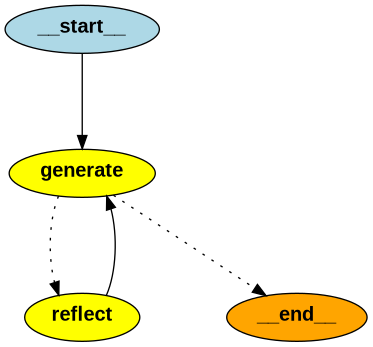

In [22]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_png()))

## Authors


[Kunal Makwana](https://author.skills.network/instructors/kunal_makwana) is a Data Scientist at IBM and is currently pursuing his Master's in Computer Science at Dalhousie University.


### Other Contributors


[Joseph Santarcangelo](https://author.skills.network/instructors/joseph_santarcangelo)


[Karan Goswami](https://author.skills.network/instructors/karan_goswami) is a Data Scientist at IBM and is currently pursuing his Masters in Engineering at McMaster University.


Copyright © 2025 IBM Corporation. All rights reserved.
